In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
from scipy.misc import imread
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.ndimage import convolve

from astropy.convolution import Tophat2DKernel

from gammapy.stats import significance

In [3]:
np.random.seed(10)
data = imread('/home/hfm/adonath/Desktop/AxelSchwarz.jpg')
data_gray = rgb2gray(data)
data_gray = 4 * rescale(data_gray, 0.2)
signal = np.pad(data_gray, ((100,100), (100, 100)), mode='constant', constant_values=0)
background = 3 * np.ones_like(signal)
data = np.random.poisson(background + signal)

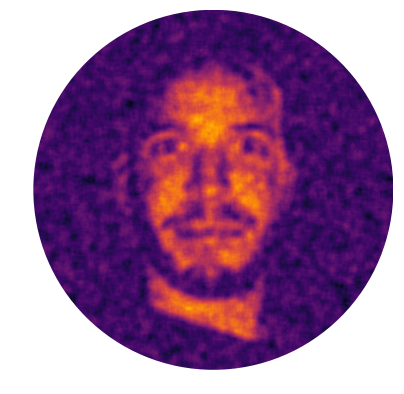

In [4]:
tophat = Tophat2DKernel(5)
tophat.normalize('peak')


n_on = convolve(data, tophat.array)
n_off = convolve(background, tophat.array)

sig = significance(n_on, n_off)

fig = plt.figure(figsize=(5, 5), facecolor='none')
ax = fig.add_axes([0, 0, 1, 1])
im = ax.imshow(sig, cmap='inferno', vmax=20, interpolation='bicubic')

y_center, x_center = 305, 257
radius = 200
patch = Circle((x_center, y_center), radius=radius, transform=ax.transData)
im.set_clip_path(patch)

ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center + radius, y_center - radius)
plt.axis('off')
plt.savefig('adonath_avatar.png', dpi=51, transparent=True)